In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import functools
import seaborn as sns
import ggplot as gg
import statsmodels.api as sm

(a) Read the data

In [4]:
heet = pd.read_table("HEET.tab")
COO_0= pd.read_table("COO_0.tab")
COO_2700 = pd.read_table("COO_2700.tab")
COO_2762 = pd.read_table("COO_2762.tab")
COO_3026 = pd.read_table("COO_3026.tab") 

In [5]:
da1 = COO_0[np.isfinite(COO_0['DiscountRate'])]
da2 = COO_2700[np.isfinite(COO_2700['DiscountRate'])]
da3 = COO_2762[np.isfinite(COO_2762['DiscountRate'])]
da4 = COO_3026[np.isfinite(COO_3026['DiscountRate'])]

In [6]:
#da1 = da1.reset_index();
#da2 = da2.reset_index();
#da3 = da3.reset_index();
#da4 = da4.reset_index();

da1['Country'] = 'Belgium';
da2['Country'] = 'Canada';
da3['Country'] = 'France';
da4['Country'] = 'Sweden';


C:\Users\Leo\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(b) Interpret values from different countries

In [7]:
frames = [da1, da2, da3, da4];
dat = pd.concat(frames)
#dat.sort_values(['Timestamp']);
dat['Growth'] = float('NaN');
#dat = dat.reset_index();

In [8]:
#dat

(c) Interplot Growth as a function of Timestamp, to find values at the same timestamps from which DiscountRate was
available.

In [9]:
heet = heet[np.isfinite(heet['Growth'])]
#heet = heet[np.isfinite(heet['Timestamp'])]
#heet = heet.reset_index()
heet.head()


,GDP,Timestamp,Bund,Growth,ID
12,6.60,0.038,-390.9,0.88,13
13,7.15,0.047,-385.1,1.84,14
14,7.70,0.055,-377.8,3.04,15
15,8.25,0.064,-394.1,0.35,16
16,8.80,0.073,-398.7,-0.42,17


In [10]:
import scipy.interpolate
y_interp=scipy.interpolate.interp1d( heet['Timestamp'], heet['Growth'])
dat['Growth'] = y_interp(dat['Timestamp'])

(d) Make a plot of DiscountRate vs. Growth

In [11]:
#g = sns.lmplot(x="DiscountRate",y="Growth",data = dat,hue ="Country")
#g.fig.suptitle('Effect of Discount Rate on Growth')

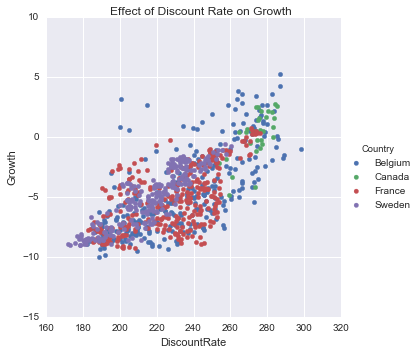

In [12]:
g = sns.FacetGrid(dat, hue="Country", size=5)
g.map(plt.scatter,"DiscountRate","Growth")
g.add_legend();
g.fig.suptitle('Effect of Discount Rate on Growth')

Extra: use GDP

In [13]:
heet = pd.read_table("HEET.tab")
#COO_0= pd.read_table("COO_0.tab")
COO_2700 = pd.read_table("COO_2700.tab")
COO_2762 = pd.read_table("COO_2762.tab")
COO_3026 = pd.read_table("COO_3026.tab") 

In [14]:
#da1 = COO_0[np.isfinite(COO_0['DiscountRate'])]
da2 = COO_2700[np.isfinite(COO_2700['GDP'])]
da3 = COO_2762[np.isfinite(COO_2762['GDP'])]
da4 = COO_3026[np.isfinite(COO_3026['GDP'])]

da1['Country'] = 'Belgium';
da2['Country'] = 'Canada';
da3['Country'] = 'France';
da4['Country'] = 'Sweden';

C:\Users\Leo\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [15]:
frames = [ da2, da3, da4];
dat = pd.concat(frames)
#dat.sort_values(['GDP']);
dat['Growth'] = float('NaN');
#dat = dat.reset_index();

In [16]:
heet = heet[np.isfinite(heet['GDP'])]
#heet = heet[np.isfinite(heet['Timestamp'])]
#heet = heet.reset_index()
#heet.tail()

In [17]:
import scipy.interpolate
y_interp=scipy.interpolate.interp1d( heet['GDP'], heet['Growth'], bounds_error=0)
dat['Growth'] = y_interp(dat['GDP'])

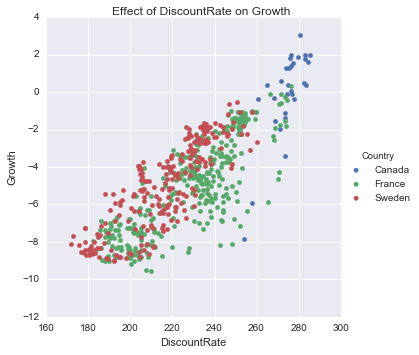

In [18]:
g = sns.FacetGrid(dat, hue="Country", size=5)
g.map(plt.scatter,"DiscountRate","Growth")
g.add_legend();
g.fig.suptitle('Effect of DiscountRate on Growth')